In [1]:
import pyflux as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
raw_df = pd.read_excel("Online Retail.xlsx")
raw_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Data Preparation. 
Extract total value paid for an item. 
Remove outliers. 
Calculate the daily revenue per country. 
Forecast the total daily revenue for the future period. 

In [4]:
raw_df['Total_value_paid'] = raw_df['Quantity']*raw_df['UnitPrice']
raw_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_value_paid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [5]:
raw_df.describe()

,Quantity,UnitPrice,CustomerID,Total_value_paid
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


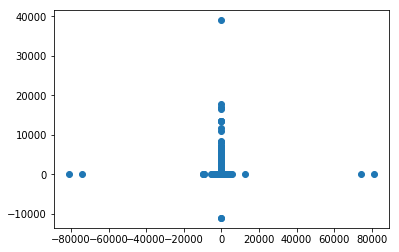

In [6]:
plt.scatter(raw_df['Quantity'], raw_df['UnitPrice'])

In [7]:
indexesToRemove = raw_df[raw_df['Quantity'] < 0].index.values

In [8]:
filtered_data = raw_df.drop(indexesToRemove, axis=0)

In [9]:
filtered_data.describe()

,Quantity,UnitPrice,CustomerID,Total_value_paid
count,531285.000000,531285.000000,397924.000000,531285.00000
mean,10.655262,3.857296,15294.315171,20.03550
std,156.830323,41.810047,1713.169877,270.91237
min,1.000000,-11062.060000,12346.000000,-11062.06000
25%,1.000000,1.250000,13969.000000,3.75000
50%,3.000000,2.080000,15159.000000,9.90000
75%,10.000000,4.130000,16795.000000,17.70000
max,80995.000000,13541.330000,18287.000000,168469.60000


In [10]:
unitPricesToRemove = raw_df[raw_df['UnitPrice'] < 0].index.values

In [11]:
filt_data = filtered_data.drop(unitPricesToRemove, axis=0)

In [12]:
filt_data.describe()

,Quantity,UnitPrice,CustomerID,Total_value_paid
count,531283.000000,531283.000000,397924.000000,531283.000000
mean,10.655299,3.898954,15294.315171,20.077218
std,156.830617,35.876279,1713.169877,270.058254
min,1.000000,0.000000,12346.000000,0.000000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range=[0,1])

In [15]:
normalized_df = scaler.fit_transform(filt_data[['Quantity', 'UnitPrice']])

C:\Users\Bruger\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
normalized_df = pd.DataFrame(normalized_df, columns=['Quantity', 'UnitPrice'])

In [17]:
normalized_df.index = filt_data.index.values

In [18]:
normalized_df.head()

,Quantity,UnitPrice
0,0.000062,0.000188
1,0.000062,0.000250
2,0.000086,0.000203
3,0.000062,0.000250
4,0.000062,0.000250


Fine the outliers: z score analysis. Remove the features that are 3 score higher than the SD from the mean

In [19]:
mean_q = normalized_df['Quantity'].mean()

In [20]:
std_q = normalized_df['Quantity'].std()

In [21]:
mean_q

0.00011921004751557853

In [22]:
std_q

0.0019363238895471326

In [23]:
outlier_index = normalized_df[normalized_df['Quantity'] >= mean_q + 3 * std_q].index

In [24]:
outlier_index

Int64Index([   730,   3917,   4850,   4945,   4946,   6365,   9745,  16427,
             16428,  16435,
            ...
            533738, 533739, 533741, 533812, 534952, 537883, 540061, 540070,
            540071, 540421],
           dtype='int64', length=465)

In [25]:
filt_data.drop(outlier_index, axis=0, inplace=True)

In [26]:
mean_up = normalized_df['UnitPrice'].mean()
std_up = normalized_df['UnitPrice'].std()
outlier_index_price = normalized_df[normalized_df['UnitPrice'] >= mean_up + 3 * std_up].index
filt_data.drop(outlier_index_price, axis=0, inplace=True)

In [27]:
filt_data.describe()

,Quantity,UnitPrice,CustomerID,Total_value_paid
count,530034.000000,530034.000000,397302.000000,530034.000000
mean,9.552782,3.292113,15293.966960,18.124648
std,22.801392,3.875944,1712.857082,48.514478
min,1.000000,0.000000,12347.000000,0.000000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15157.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.570000
max,480.000000,110.920000,18287.000000,3322.100000


In [28]:
filt_data['Country'].value_counts()

United Kingdom          485144
Germany                   9033
France                    8398
EIRE                      7884
Spain                     2485
Netherlands               2352
Belgium                   2031
Switzerland               1967
Portugal                  1495
Australia                 1174
Norway                    1068
Italy                      757
Channel Islands            747
Finland                    684
Cyprus                     607
Unspecified                446
Sweden                     440
Austria                    398
Denmark                    380
Poland                     330
Japan                      309
Israel                     294
Hong Kong                  280
Singapore                  214
Iceland                    182
USA                        179
Canada                     149
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [29]:
df = filt_data[filt_data['Country'] == 'United Kingdom']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_value_paid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Calculate the daily revenue

In [30]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
7        2010-12-01 08:28:00
8        2010-12-01 08:28:00
9        2010-12-01 08:34:00
10       2010-12-01 08:34:00
11       2010-12-01 08:34:00
12       2010-12-01 08:34:00
13       2010-12-01 08:34:00
14       2010-12-01 08:34:00
15       2010-12-01 08:34:00
16       2010-12-01 08:34:00
17       2010-12-01 08:34:00
18       2010-12-01 08:34:00
19       2010-12-01 08:34:00
20       2010-12-01 08:34:00
21       2010-12-01 08:34:00
22       2010-12-01 08:34:00
23       2010-12-01 08:34:00
24       2010-12-01 08:34:00
25       2010-12-01 08:35:00
46       2010-12-01 09:00:00
47       2010-12-01 09:01:00
48       2010-12-01 09:01:00
49       2010-12-01 09:02:00
                 ...        
541864   2011-12-09 12:21:00
541865   2011-12-09 12:23:00
541866   2011-12-09 12:23:00
541867   2011-

In [31]:
daily_revenue_df = df.groupby(df['InvoiceDate'].dt.date)[['Total_value_paid']].sum()

In [32]:
daily_revenue_df.reset_index(inplace=True)

In [33]:
daily_revenue_df.head()

,InvoiceDate,Total_value_paid
0,2010-12-01,53331.82
1,2010-12-02,44095.93
2,2010-12-03,39547.21
3,2010-12-05,25738.00
4,2010-12-06,50566.52


In [34]:
daily_revenue_df['InvoiceDate'] = pd.to_datetime(daily_revenue_df['InvoiceDate'])
full_df = staging_df.merge(daily_revenue_df, how='left', left_on'Date', right_on='InvoiceDate')

SyntaxError: invalid syntax (<ipython-input-34-78dbcac220b5>, line 2)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(full_df['Date'], full_df['Total_value_paid'])
plt.title('Daily revenues')
plt.ylable('Total Value Paid')
plt.xlable('Date')

In [ ]:
full_df['Total_value_paid'] = full_df['Total_value_paid'].fillna(method='ffill')
full_df.isnull().sum()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(full_df['Date'], full_df['Total_value_paid'])
plt.title('Daily revenues')
plt.ylable('Total Value Paid')
plt.xlable('Date')

In [ ]:
ts_df = full_df['', '']

Time series forecasting. ARIMA. VAR. Facebook Prophet

Divide data into training and testing set

In [ ]:
working_data = ts_df[:-30] # everything except last 30 days
df_test = ts_df[-30:] #Only last 30 days

In [ ]:
from statsmodels.tsa.stattools import adfuller
kpi_to_forecast = Total_value_paid
df_stationary_test = adfuller(working_data[kpi_to_forecast])
df_stationary_test

In [ ]:
test_statistics = df_stationary_test[0]
test_statistics

In [ ]:
critical_values = df_stationary_test[4]
critical_values

In [ ]:
critical_value_to_analyze = critical_values['1%']
critical_value_to_analyze

In [ ]:
def return_conclusion(test_statistics, critical_value_to_analyze):
    if test_statistics > critical_value_to_analyze:
        print("THe series is not stationary")
    else:
        print("the series is stationary")

In [ ]:
return_conclusion(test_statistics, critical_value_to_analyze)

In [ ]:
working_data.index = working_data['Date']
working_data.drop('Date', axis=1, inplace=True)
working_data.head()

In [ ]:
working_data.shift()

In [ ]:
data_diff = working_data-working_data.shift()
data_diff

In [ ]:
plt.plot(data_diff.index, working_data[kpi_to_forecast])

In [ ]:
data_diff.head()

In [ ]:
data_diff.dropna(inplace=True)

In [ ]:
df_stationary_test = adfuller(data_diff[kpi_to_forecast])

In [ ]:
return_conclusion(df_stationary_test[0], critical_values)

In [ ]:
model = pf.ARIMA(data=working_data, ar=7, ma=13, integ=0)
x=model.fit()
x.summary()

In [ ]:
predicted_df = model.predict(h=39)
predicted_df

In [ ]:
model.plot_fit()